In [1]:
import pandas as pd
import pickle
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pybaseball as pyb
from pybaseball import statcast
import numpy as np
import matplotlib.lines 
from matplotlib.lines import Line2D

In [2]:
hit_scores_data = pd.read_csv("/Users/nickarrivo/MLB-Hitter-Ratings/Datasets/Improved Vertical Merge Composite Score w stats.csv")

In [3]:
hit_scores_data['Name'] = hit_scores_data[' first_name_x'] + hit_scores_data['last_name_x']

In [4]:
df = hit_scores_data

In [5]:
df['Name'] = df[' first_name_x'] +' '+ df['last_name_x']
df['Name'] = df['Name'].str.strip()

In [6]:
import matplotlib.pyplot as plt

def multi_plot(df, player_name, year):
    plt.style.use('seaborn-v0_8')

    # Plot composite score trend
    plt.subplot(2, 2, 1)
    player_df = df[df['Name'] == player_name]
    years = player_df['year_x']
    composite_scores = player_df['composite_score_scaled']
    plt.plot(years, composite_scores, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Composite Score')
    plt.title('Composite Score Trend')
    plt.ylim(0,100)
    for x, y in zip(years, composite_scores):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')


    # Plot player scores
    plt.subplot(2, 2, 2)
    player_scores = player_df[['power_score', 'contact_score', 'discipline_score']]
    labels = ['Power Score', 'Contact Score', 'Discipline Score']
    colors = ['#DF4E23', '#6166B3', '#319197']
    bars = plt.bar(labels, player_scores.values[0], color=colors)
    plt.xlabel('Scores')
    plt.ylabel('Score Value')
    plt.title('Player Scores')
    plt.ylim(0,100)
    for bar, score in zip(bars, player_scores.values[0]):
        plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.2f}', ha='center', va='bottom')


    # Plot player stats
    plt.subplot(2, 2, 3)
    player_stats = player_df[['on_base_plus_slg', 'woba', 'batting_avg', 'on_base_percent']]
    labels = ['OPS', 'WOBA', 'AVG', 'OBP']
    colors = ['#DF4E23', '#6166B3', '#319197', '#23D9DF']
    bars = plt.bar(labels, player_stats.values[0], color=colors)
    plt.xlabel('Stats')
    plt.ylabel('Stat Value')
    plt.title('Player Stats')
    plt.ylim(0,1)
    for bar, stat in zip(bars, player_stats.values[0]):
        plt.text(bar.get_x() + bar.get_width() / 2, stat, str(stat), ha='center', va='bottom')


    # Plot player percents
    plt.subplot(2, 2, 4)
    player_percents = player_df[['bb_percent', 'k_percent']]
    labels = ['BB%', 'K%']
    colors = ['#DF4E23', '#6166B3']
    bars = plt.bar(labels, player_percents.values[0], color=colors)
    plt.xlabel('Percents')
    plt.ylabel('Percent Value')
    plt.title('Player Percents')
    plt.ylim(0,50)
    for bar, percent in zip(bars, player_percents.values[0]):
        plt.text(bar.get_x() + bar.get_width() / 2, percent, str(percent), ha='center', va='bottom')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

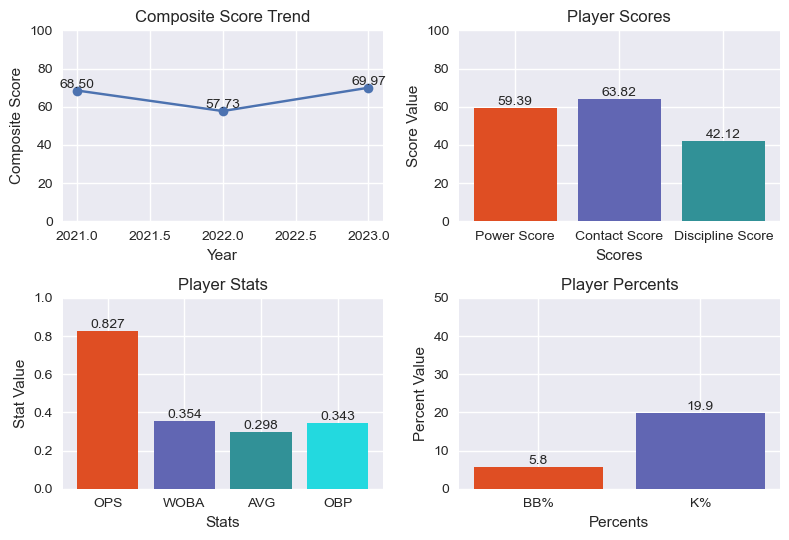

In [7]:
multi_plot(df, "Bo Bichette", 2023)